## Amazon-Book-Reviews-Classification

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tqdm as tqdm


# Load the dataset
data = pd.read_csv('small_books_rating.csv')

# Filter and convert scores to binary classification
# remove neutral reviews
data = data[data['review/score'] != 3]
# convert data to binary classification
data['label'] = data['review/score'].apply(lambda x: 1 if x >= 4 else 0)

# Train/Test split
X = data[['review/text', 'Title', 'review/summary']]  # Features
y = data['label']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, shuffle=True)


In [7]:

def class_distribution(data):
    return data.value_counts().tolist()

y_train_counts = class_distribution(y_train)
y_test_counts = class_distribution(y_test)

print("Data distribution")
print('Train Data: ', 'Pos:', y_train_counts[0], ', Neg:', y_train_counts[1])
print('Test Data: ', 'Pos:', y_test_counts[0], ', Neg:', y_test_counts[1])

Data distribution
Train Data:  Pos: 13506 , Neg: 13494
Test Data:  Pos: 1506 , Neg: 1494


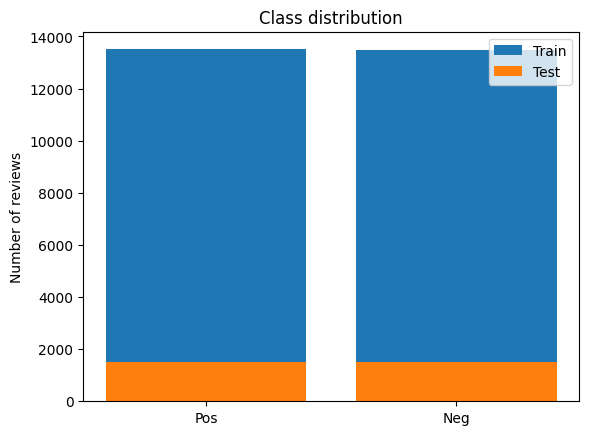

In [10]:
# Plot the distribution

fig, ax = plt.subplots()
ax.bar(['Pos', 'Neg'], y_train_counts, label='Train')
ax.bar(['Pos', 'Neg'], y_test_counts, label='Test')
ax.set_ylabel('Number of reviews')
ax.set_title('Class distribution')
ax.legend()
plt.show()


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# BoW Vectorization
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train['review/text'])
X_test_bow = vectorizer_bow.transform(X_test['review/text'])

# Naive Bayes with BoW
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
nb_bow_preds = nb_bow.predict(X_test_bow)

# SVM with BoW
svm_bow = SVC()
svm_bow.fit(X_train_bow, y_train)
svm_bow_preds = svm_bow.predict(X_test_bow)

print("Naive Bayes with BoW:")
print("> Accuracy:", accuracy_score(y_test, nb_bow_preds))
print("> F1 Score:", f1_score(y_test, nb_bow_preds))

print("SVM with BoW:")
print("> Accuracy:", accuracy_score(y_test, svm_bow_preds))
print("> F1 Score:", f1_score(y_test, svm_bow_preds))


Naive Bayes with BoW:
	Accuracy: 0.862
	F1 Score: 0.8542253521126761
SVM with BoW:
	Accuracy: 0.854
	F1 Score: 0.8556361239288068


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train['review/text'])
X_test_tfidf = vectorizer_tfidf.transform(X_test['review/text'])

# Naive Bayes with TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
nb_tfidf_preds = nb_tfidf.predict(X_test_tfidf)

# SVM with TF-IDF
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
svm_tfidf_preds = svm_tfidf.predict(X_test_tfidf)


print("Naive Bayes with TF-IDF:")
print("> Accuracy:", accuracy_score(y_test, nb_tfidf_preds))
print("> F1 Score:", f1_score(y_test, nb_tfidf_preds))

print("SVM with TF-IDF:")
print("> Accuracy:", accuracy_score(y_test, svm_tfidf_preds))
print("> F1 Score:", f1_score(y_test, svm_tfidf_preds))


Naive Bayes with TF-IDF:
> Accuracy: 0.8766666666666667
> F1 Score: 0.8732008224811515
SVM with TF-IDF:
> Accuracy: 0.9003333333333333
> F1 Score: 0.9003665444851717


In [15]:
import gensim
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec model
sentences = [row.split() for row in X_train['review/text']]
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec.save("word2vec.model")

# Function to transform text to embeddings
def get_vectorized_text(text):
    words = text.split()
    vector = np.zeros(100)
    count = 0
    for word in words:
        if word in word2vec.wv.index_to_key:
            vector += word2vec.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

X_train_w2v = np.array([
    get_vectorized_text(text) for text in X_train['review/text']])
X_test_w2v = np.array([
    get_vectorized_text(text) for text in X_test['review/text']])

# Naive Bayes with Word2Vec (using GaussianNB as embeddings are continuous)
from sklearn.naive_bayes import GaussianNB
nb_w2v = GaussianNB()
nb_w2v.fit(X_train_w2v, y_train)
nb_w2v_preds = nb_w2v.predict(X_test_w2v)

# SVM with Word2Vec
svm_w2v = SVC()
svm_w2v.fit(X_train_w2v, y_train)
svm_w2v_preds = svm_w2v.predict(X_test_w2v)


print("Naive Bayes with Word2Vec:")
print("> Accuracy:", accuracy_score(y_test, nb_w2v_preds))
print("> F1 Score:", f1_score(y_test, nb_w2v_preds))

print("SVM with Word2Vec:")
print("> Accuracy:", accuracy_score(y_test, svm_w2v_preds))
print("> F1 Score:", f1_score(y_test, svm_w2v_preds))

Naive Bayes with Word2Vec:
> Accuracy: 0.6573333333333333
> F1 Score: 0.6415620641562064
SVM with Word2Vec:
> Accuracy: 0.7733333333333333
> F1 Score: 0.7725752508361204
